# Project: Investigate a Dataset (TMDb movie data )

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue. 
The creator continuously had a huge intrigued in observing motion pictures. As most individuals did, the creator moreover experienced great and terrible motion pictures. But what decides in case a motion picture is considered as great or terrible? There may be a few components influencig the quality of a motion picture, as for illustration the budget, class, etc. This small venture ought to offer assistance the creator to progress his information analytics abilities and investigate a few of the victory criteria for motion pictures.


## Questions to answer
> 
Which genres are most popular from year to year? What kinds of properties are associated with movies that have high revenues?

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.options.display.float_format = '{:.2f}'.format

In [3]:
df = pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.99,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.50,2015,137999939.28,1392445892.52
1,76341,tt1392190,28.42,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.10,2015,137999939.28,348161292.49
2,262500,tt2908446,13.11,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.30,2015,101199955.47,271619025.41
3,140607,tt2488496,11.17,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.50,2015,183999919.04,1902723129.80
4,168259,tt2820852,9.34,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.30,2015,174799923.09,1385748801.47


In [4]:
df.info(),
print('Dataframe contains {} rows and {} columns'.format(df.shape[0],df.shape[1]))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

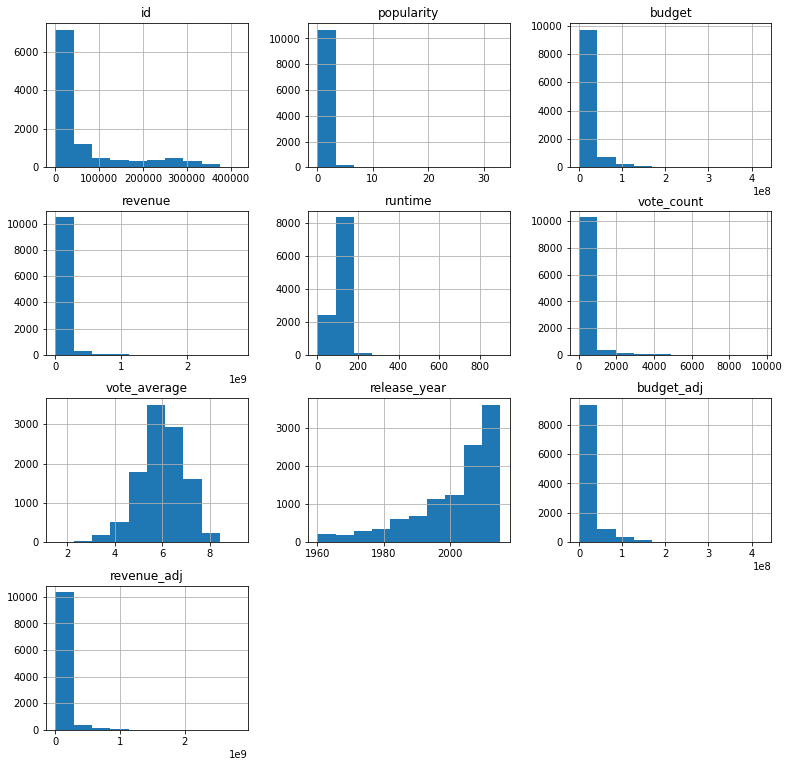

In [5]:
df.hist(figsize=(13,13));

In [6]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.00,10866.00,10866.00,10866.00,10866.00,10866.00,10866.00,10866.00,10866.00,10866.00
mean,66064.18,0.65,14625701.09,39823319.79,102.07,217.39,5.97,2001.32,17551039.82,51364363.25
std,92130.14,1.00,30913213.83,117003486.58,31.38,575.62,0.94,12.81,34306155.72,144632485.04
min,5.00,0.00,0.00,0.00,0.00,10.00,1.50,1960.00,0.00,0.00
25%,10596.25,0.21,0.00,0.00,90.00,17.00,5.40,1995.00,0.00,0.00
50%,20669.00,0.38,0.00,0.00,99.00,38.00,6.00,2006.00,0.00,0.00
75%,75610.00,0.71,15000000.00,24000000.00,111.00,145.75,6.60,2011.00,20853251.08,33697095.72
max,417859.00,32.99,425000000.00,2781505847.00,900.00,9767.00,9.20,2015.00,425000000.00,2827123750.41


--> There are plenty of columns indicating a problem. Many rows seems to contain several values, which are seperated by an "|". They need to be cleaned in the first place in order to provide a proper dataset for the intended analysis. The rows containing such values are:

- cast
- director
- keywords
- genres
- production_companies

--> Evenmore, there are columns in the dataset, which are not important to the intended analysis and therefore will be removed by the author. This includes:

- imdb_id
- homepage
- overview
- release_date
- tagline

### Dealing with 0 
--> df.info( ) revealed that most columns with important content for the analysis, such us revenue, release_year, etc. have a big amount of available data for the analysis. However, the .describe() method, as well as the histogramms, indicate that many columns, especially budget and revenue, contain many "0" in their columns. In order to provide a proper analysis, the columns "budget_adj", "revenue_adj", "budget", "revenue" and "runtime" will change its "0" values into "nan" and the respective colums will be dropped for the analysis.

### Data Cleaning

--> In this section the before mentioned "0" will be replaced with nan-Values and will be dropped. Then, the rows with several values will be seperated in single columns containing only one value. This is needed in order to perform a proper analysis. Afterwards, unwanted rows for the analysis will be dropped, before the author will perform general data cleaning action as dropping duplicated lines, correct data types, check duplicated entries in some selected columns.

--> I did that to  perform a proper analysis,correct data types, check duplicated entries in some selected columns.


-->The primary goal of Data Cleaning is to identify and remove errors and duplicate data in order to create a trustworthy dataset. This improves the quality of training data for analytics and allows for more precise decision-making.

In [16]:
df = pd.read_csv('tmdb-movies.csv', na_values='?')

df.dropna(axis=0, inplace=True)

In [17]:
df_c.head()

,cast_1,cast_2,cast_3,cast_4,cast_5
0,Chris Pratt,Bryce Dallas Howard,Irrfan Khan,Vincent D'Onofrio,Nick Robinson
1,Tom Hardy,Charlize Theron,Hugh Keays-Byrne,Nicholas Hoult,Josh Helman
2,Shailene Woodley,Theo James,Kate Winslet,Ansel Elgort,Miles Teller
3,Harrison Ford,Mark Hamill,Carrie Fisher,Adam Driver,Daisy Ridley
4,Vin Diesel,Paul Walker,Jason Statham,Michelle Rodriguez,Dwayne Johnson


In [12]:
df = df.join([df_c, df_d, df_k, df_g, df_p])
df = df.drop(['cast', 'keywords', 'director', 'genres', 'production_companies', 'imdb_id', 'homepage', 'overview', 'release_date', 'tagline'], axis=1)

In [13]:
df.duplicated().sum()

0

In [14]:
df['original_title'].value_counts().head()

Wanted                 2
Home                   2
Sleeping Beauty        2
Survivor               2
Clash of the Titans    2
Name: original_title, dtype: int64

In [15]:
limit_4_title = df['original_title'].value_counts().index.tolist()
limit_4_title = limit_4_title[:4]
limit_4_title

limit_4_id = df['original_title'].value_counts().index.tolist()

def check_double_title(names):
    for limit in limit_4_title:
        df_title = df[df['original_title'] == limit]
        print(df_title.iloc[:,:5])
        
        
check_double_title(limit_4_title)

         id  popularity    budget    revenue original_title
1733  22717        0.28        75        134         Wanted
2893   8909        1.98  75000000  258270008         Wanted
          id  popularity     budget    revenue original_title
46    228161        2.98  135000000  368871007           Home
1513   62320        0.69          0          0           Home
          id  popularity    budget  revenue   original_title
960   275318        0.38         0        0  Sleeping Beauty
3500   64586        0.85  10000000        0  Sleeping Beauty
          id  popularity    budget  revenue original_title
67    334074        2.33  20000000        0       Survivor
1133  281778        0.19         0        0       Survivor


## What kinds of properties are associated with movies that have high revenues?

In [21]:
# Creating a copy of the original DataFrame
df_revenue = df

In [23]:
#Performing basic statistic in order to create 4 classifications 
df_revenue['revenue_adj'].describe()

count         1287.00
mean     199177499.23
std      296851462.45
min             43.00
25%       27648902.20
50%       86747695.58
75%      235117806.64
max     2827123750.41
Name: revenue_adj, dtype: float64

In [24]:
bin_edges = [2.37,10465848.09,43956661.16,131648235.91,2827123750.41]
bin_names = ['very low' ,'low' ,'medium' ,'high' ] 
df_revenue['revenue_level'] = pd.cut(df_revenue['revenue_adj'], bin_edges, labels=bin_names)

In [25]:
#list of revenue_levels classification is created for loop in next cell
df_revenue['revenue_level'].unique()
revenue_levels = df_revenue['revenue_level'].unique().tolist()
del revenue_levels[-1]

In [26]:
#nested dictionary is created with 8 attributes based on revenue_levels
movie_data = {}

for level in revenue_levels:

    grouped_data = df_revenue[df_revenue['revenue_level'] == level]

    director = grouped_data.loc[:, 'director_1': 'director_6']
    frequent_director = director.stack().value_counts().idxmax()

    cast = grouped_data.loc[:, 'cast_1': 'cast_5']
    frequent_cast = cast.stack().value_counts().idxmax()

    genres = grouped_data.loc[:, 'genres_1': 'genres_5']
    frequent_genres = genres.stack().value_counts().idxmax()

    production = grouped_data.loc[:, 'production_companies_1': 'production_companies_5']
    frequent_production = production.stack().value_counts().idxmax()

    release_year = grouped_data['release_year'].value_counts().idxmax()

    avg_duration = grouped_data['runtime'].mean()
    avg_budget = grouped_data['budget_adj'].mean()
    avg_vote = grouped_data['vote_average'].mean()
  
    movie_data[level] = {'avg_duration' : avg_duration, 
                         'frequent_director' : frequent_director, 
                         'avg_budget' : avg_budget, 
                         'avg_vote' : avg_vote,
                        'frequent_cast' : frequent_cast,
                        'frequent_genres' : frequent_genres,
                        'release_year' : release_year,
                        'frequent_production_companies' : frequent_production}

In [27]:
movie_classes = []
frames = []

for movie_class, d in movie_data.items():
    movie_classes.append(movie_class)
    frames.append(pd.DataFrame.from_dict(d, orient='index'))
    
properties = pd.concat(frames, keys=movie_classes)  

properties.columns = ['values']
properties

values
high     avg_duration                               117.54
         frequent_director                Steven Spielberg
         avg_budget                            95442930.57
         avg_vote                                     6.52
         frequent_cast                   Samuel L. Jackson
         frequent_genres                            Action
         release_year                                 2011
         frequent_production_companies  Universal Pictures
low      avg_duration                               105.01
         frequent_director                  John Carpenter
         avg_budget                            25129745.42
         avg_vote                                     6.17
         frequent_cast                       Colin Farrell
         frequent_genres                             Drama
         release_year                                 2011
         frequent_production_companies  Universal Pictures
medium   avg_duration                               107.83
         frequent_director                  John Carpenter
         avg_budget                            39912951.34
         avg_vote                                     6.17
         frequent_cast                       Jason Bateman
         frequent_genres                             Drama
         release_year                                 2011
         frequent_production_companies        Warner Bros.
very low avg_duration                               102.02
         frequent_director                    Rian Johnson
         avg_budget                            10380165.24
         avg_vote                                     5.99
         frequent_cast                          Ellen Page
         frequent_genres                             Drama
         release_year                                 2010
         frequent_production_companies           Lionsgate

## Did movies with higher vote count received a better rating?

In [32]:
#Slice DataFrame to get 2 columns 'vote_count' and 'vote_average'
df_vote = df.loc[:, 'vote_count' : 'vote_average']
#To compare results only entries are considered with more than 2000 votes
df_vote_2000 = df_vote[df_vote['vote_count'] > 2000]

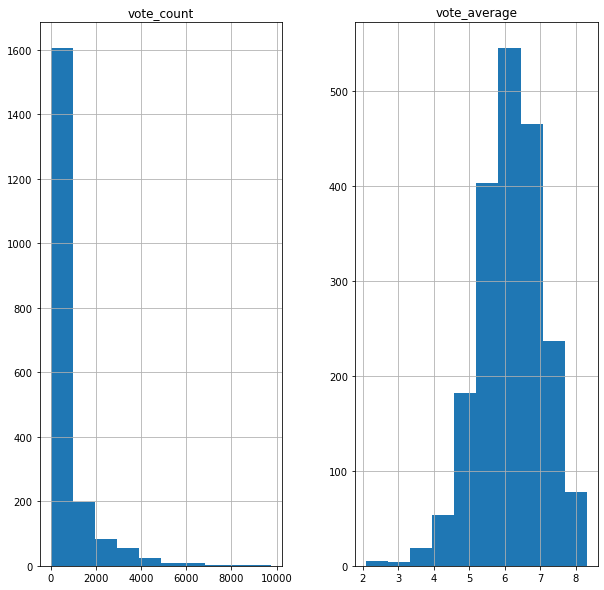

In [41]:

df_vote.hist(figsize=(10,10));

"Did movies with a higher vote count receive a better rating?" does not imply that movies with a higher vote count have a higher vote average. Also, taking into account columns with more than 2000 vote counts has no effect on the overall impression. Furthermore, the corralation does not imply that higher vote totals equal higher vote averages.

In [30]:
df_vote.corr()

,vote_count,vote_average
vote_count,1.00,0.46
vote_average,0.46,1.00


In [31]:
df_vote_2000.corr()

,vote_count,vote_average
vote_count,1.00,0.31
vote_average,0.31,1.00


## Conclusions

-> The TMDb movie dataset provide many information on all movies. After Data Wrangling, null values, duplicated values and 0 values were removed to provide more accurate results. Also, wrong datatypes were corrected and new columns .




-> The first research question, "Which genres are most popular from year to year?" yielded unexpected results, as the most popular genre varied greatly. To the author's surprise, only 11 times were the most frequently produced genres also voted as the best genre by users. The two values differed on all of the remaining 40 occasions.

 --> The second research question, "Did movies with a higher vote count receive a better rating?" does not imply that movies with a higher vote count have a higher vote average. Also, taking into account columns with more than 2000 vote counts has no effect on the overall impression. Furthermore, the corralation does not imply that higher vote totals equal higher vote averages.






### Limitation

Although we successfully predited the above properties on TMDb movie dataset, there are many infomation removed such as rows contained 0 values and null values. The dataset was cut by few thousand rows of movies, which would definitly affect the result. Also, every movies received different number of votes. Therefore, movies with fewer votes or higher votes would not be accurate. There should be a consistent way to collect the information in order to make it useful for analyzing the data.

